In [23]:
#importing Pandas as pd and os
import pandas as pd
import os 
import numpy as np

#changing directory to Datasets
os.chdir('C:/Users/TIRTHA/Desktop/DataScience')

# storing insurance.csv as a pandas object
dfirs = pd.read_csv("insurance.csv")

In [2]:
dfirs

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,19,female,27.9,107,No,0,Yes,southwest,16884.92
1,18,male,33.8,133,No,1,No,southeast,1725.55
2,28,male,33.0,88,Yes,3,No,southeast,4449.46
3,33,male,22.7,119,Yes,0,No,northwest,21984.47
4,32,male,28.9,91,No,0,No,northwest,3866.86
...,...,...,...,...,...,...,...,...,...
1333,50,male,31.0,98,No,3,No,northwest,10600.55
1334,18,female,31.9,138,No,0,No,northeast,2205.98
1335,18,female,36.9,114,No,0,No,southeast,1629.83
1336,21,female,25.8,121,Yes,0,No,southwest,2007.95


In [3]:
# Setting max row of pandas object display 
pd.options.display.max_rows=None

In [4]:
# Q1.What is the avg claim for males and for females?
#Filtering data from dataframe by male and female and calculating avg for both
print(f"Avg Claim for Males :-{dfirs[dfirs['gender']=='male']['claim'].mean()}\nAvg Claim for Females :-{dfirs[dfirs['gender']=='female']['claim'].mean()}")

Avg Claim for Males :-13956.751420118353
Avg Claim for Females :-12569.578897280966


In [5]:
# Q2.Do you think the claim is more for Older people while less for the younger ones?
# Taking people over 40 as old people 
old_age=40
mean_old=dfirs[dfirs['age']>old_age]['claim'].mean()
mean_young=dfirs[dfirs['age']<old_age]['claim'].mean()
print(f"Avg Claim for Young people(age<={old_age}) :-{mean_young}")
print(f"Avg Claim for Old people(age>{old_age}) :-{mean_old}")
if mean_old > mean_young:
    print(f"Since the avarage claim of old people is more thant young people the statement proves right, but it may vary on the age limit of young people. Here which is {old_age}")
else:
    print(f"The statement doesn't stand in this instance with the age limit of young people being {old_age}")

Avg Claim for Young people(age<=40) :-10157.217744807129
Avg Claim for Old people(age>40) :-16627.95861852433
Since the avarage claim of old people is more thant young people the statement proves right, but it may vary on the age limit of young people. Here which is 40


In [6]:
# Q3.Do you think there is correlation between bmi and claim ?
print(f"The correlation between bmi and claim = {dfirs['bmi'].corr(dfirs['claim'])}")

The correlation between bmi and claim = 0.198576255018932


In [7]:
# Q4.Do you think there is co relation between blood pressure and claim ?
print(f"The correlation between blood pressure and claim = {dfirs['bloodpressure'].corr(dfirs['claim'])}")

The correlation between blood pressure and claim = -0.028208011288487163


count      200.000000
mean     12858.005750
std      10995.190835
min       4415.160000
25%       6657.707500
50%       8024.905000
75%      13029.275000
max      48885.140000
Name: claim, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


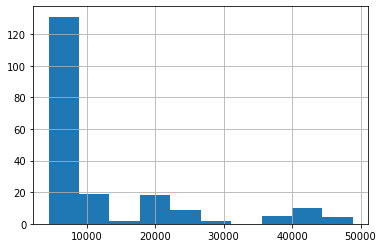

In [8]:
# Q5.What is the distribution of the claim variable for females who are aged between 34 and 48 ?
import matplotlib.pyplot as plt

fe_claim = dfirs[(dfirs['gender']=='female') &(dfirs['age'] >= 34)&(dfirs['age'] <= 48)]['claim']
# A histogram is a representation of the distribution of data.
print(f"{dfirs[(dfirs['gender']=='female') &(dfirs['age'] >= 34)&(dfirs['age'] <= 48)]['claim'].describe()}")
print(fe_claim.hist())

AxesSubplot(0.125,0.125;0.775x0.755)


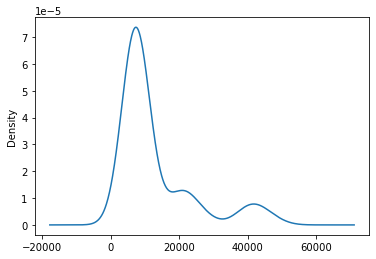

In [9]:
# Representation of a kernel-density estimate using Gaussian kernels.
print(fe_claim.plot.kde())

In [10]:
# standard deviation 
print(fe_claim.std())

10995.190834517782


In [11]:
# Q6.What is the max claim for diabetic smoker patients?
print(f"Max claim for diabetic smoker patients:- {dfirs[(dfirs['diabetic']=='Yes') & (dfirs['smoker']=='Yes') ]['claim'].max()}")

Max claim for diabetic smoker patients:- 60021.4


In [12]:
# Q7.How many males are smoker and non-diabetic?
print(f"Number of males that are smoker and non-diabetic:- {dfirs[(dfirs['gender']=='male') & (dfirs['smoker']=='Yes') &(dfirs['diabetic']=='No') ].shape[0]}")

Number of males that are smoker and non-diabetic:- 83


In [13]:
dfirs.corr()

,age,bmi,bloodpressure,children,claim
age,1.000000,0.109341,-0.080593,0.042469,0.299008
bmi,0.109341,1.000000,-0.015544,0.012645,0.198576
bloodpressure,-0.080593,-0.015544,1.000000,-0.043967,-0.028208
children,0.042469,0.012645,-0.043967,1.000000,0.067998
claim,0.299008,0.198576,-0.028208,0.067998,1.000000


In [14]:
dfirs['claim'].describe()

count     1338.000000
mean     13270.422414
std      12110.011240
min       1121.870000
25%       4740.287500
50%       9382.030000
75%      16639.915000
max      63770.430000
Name: claim, dtype: float64

<AxesSubplot:>

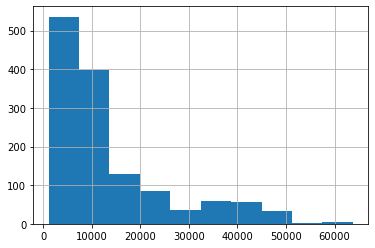

In [15]:
dfirs['claim'].hist()

In [16]:
dfirs['claim'].skew()

1.51587966289798

<AxesSubplot:>

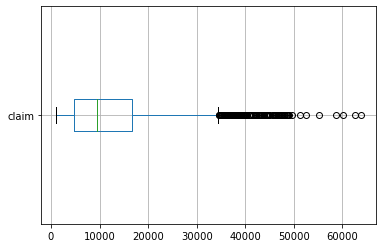

In [17]:
dfirs[['claim']].boxplot(vert=False)

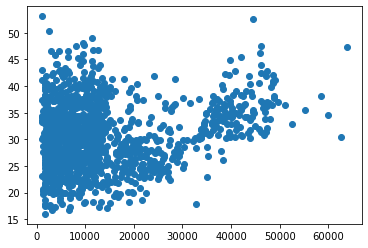

In [18]:
plt.scatter(dfirs['claim'],dfirs['bmi'])

AxesSubplot(0.125,0.125;0.775x0.755)


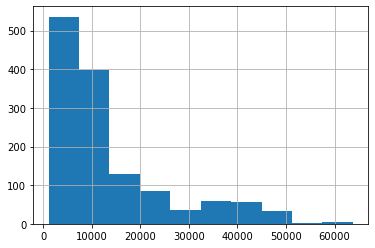

In [20]:
print(dfirs['claim'].hist())

AxesSubplot(0.125,0.125;0.775x0.755)


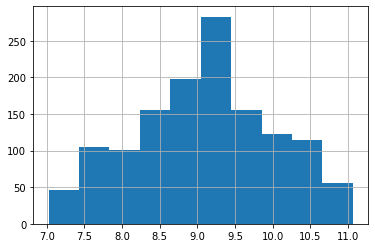

In [40]:
x = np.log(dfirs['claim'])
print(x.hist())

<AxesSubplot:>

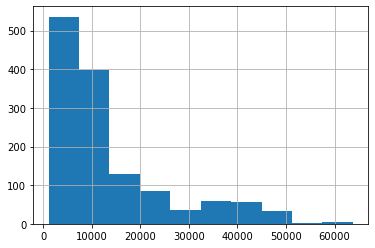

In [35]:
y=np.exp(x)
y.hist()

In [45]:
dfirs.describe()

,age,bmi,bloodpressure,children,claim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,109.397608,1.094918,13270.422414
std,14.049960,6.098382,17.519398,1.205493,12110.011240
min,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,27.000000,26.300000,94.000000,0.000000,4740.287500
50%,39.000000,30.400000,109.000000,1.000000,9382.030000
75%,51.000000,34.700000,124.000000,2.000000,16639.915000
max,64.000000,53.100000,140.000000,5.000000,63770.430000


In [46]:
dfirs.cov()

,age,bmi,bloodpressure,children,claim
age,197.401387,9.368560,-19.837799,0.719303,5.087480e+04
bmi,9.368560,37.190265,-1.660681,0.092958,1.466515e+04
bloodpressure,-19.837799,-1.660681,306.929299,-0.928569,-5.984615e+03
children,0.719303,0.092958,-0.928569,1.453213,9.926742e+02
claim,50874.802133,14665.149703,-5984.614611,992.674243,1.466524e+08
